In [27]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
import statsmodels.stats.api as sm
from statsmodels.stats.power import ttest_power

In [2]:
import os
os.getcwd()

'C:\\Users\\Sanjeev\\Downloads\\Scripts\\Statistical Methods for Decision Making\\Project - SMDM'

Problem 1

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data (Wholesale Customer.csv) consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

1.1. Use methods of descriptive statistics to summarize data.
Which Region and which Channel seems to spend more?
Which Region and which Channel seems to spend less?

In [3]:
cust = pd.read_csv('Wholesale Customer.csv')

cust.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [4]:
cust['Channel'].unique()

cust['Channel'].value_counts()


Hotel     298
Retail    142
Name: Channel, dtype: int64

In [5]:
cust['Region'].unique()

cust['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [6]:
del cust['Buyer/Spender']
cust.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


In [7]:
import copy
wh_cust_spending = copy.deepcopy(cust)
wh_cust_spending['Spending'] = cust['Fresh']+cust['Milk']+cust['Grocery']+cust['Frozen']+cust['Detergents_Paper']+cust['Delicatessen']
wh_cust_spending

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [8]:
region_spend = wh_cust_spending.groupby('Region')['Spending'].sum()
print(region_spend)

print(' ')

channel_spend = wh_cust_spending.groupby('Channel')['Spending'].sum()
print(channel_spend)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spending, dtype: int64
 
Channel
Hotel     7999569
Retail    6619931
Name: Spending, dtype: int64


Region which spends more is Other and Channel which spends more is Hotel


Region which spends less is Oporto and Channel which spends less is Retail

1.2. There are 6 different varieties of items are considered.
Do all varieties show similar behaviour across Region and Channel?

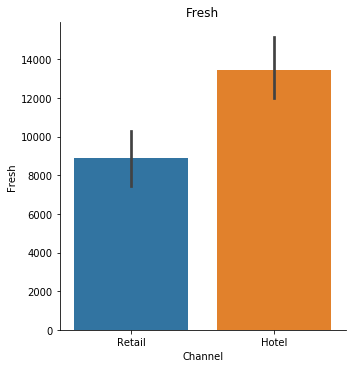

In [9]:
sns.catplot(x="Channel", y="Fresh", kind="bar", data=cust);
plt.title('Fresh');

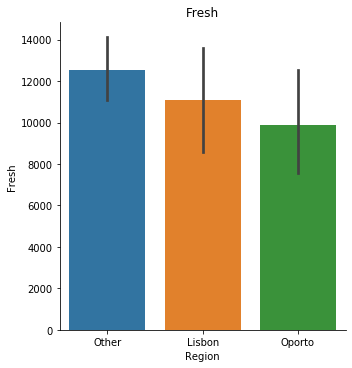

In [10]:
sns.catplot(x="Region", y="Fresh", kind="bar", data=cust);
plt.title('Fresh');

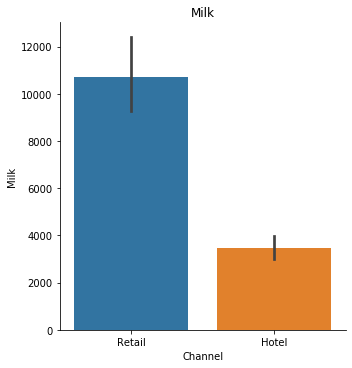

In [11]:
sns.catplot(x="Channel", y="Milk", kind="bar", data=cust);
plt.title('Milk');

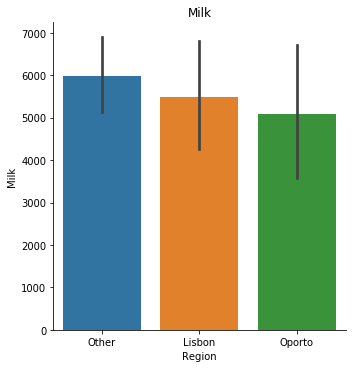

In [12]:
sns.catplot(x="Region", y="Milk", kind="bar", data=cust);
plt.title('Milk');

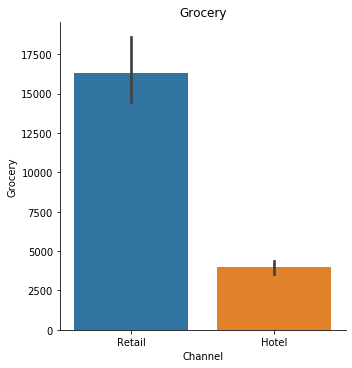

In [13]:
sns.catplot(x="Channel", y="Grocery", kind="bar", data=cust);
plt.title('Grocery');

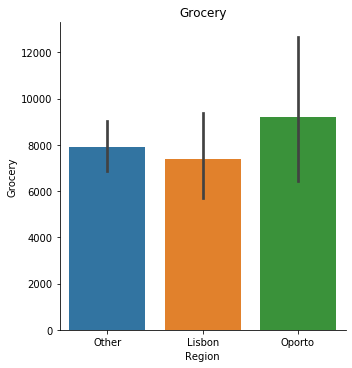

In [14]:
sns.catplot(x="Region", y="Grocery", kind="bar", data=cust);
plt.title('Grocery');

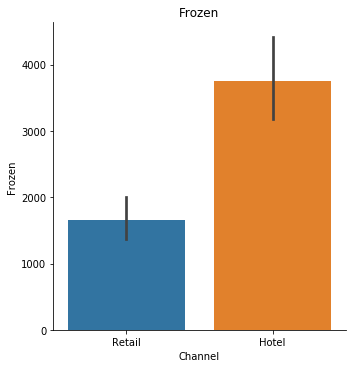

In [15]:
sns.catplot(x="Channel", y="Frozen", kind="bar", data=cust);
plt.title('Frozen');

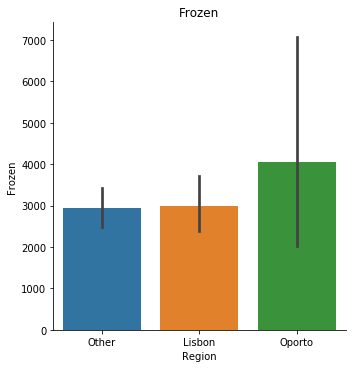

In [16]:
sns.catplot(x="Region", y="Frozen", kind="bar", data=cust);
plt.title('Frozen');

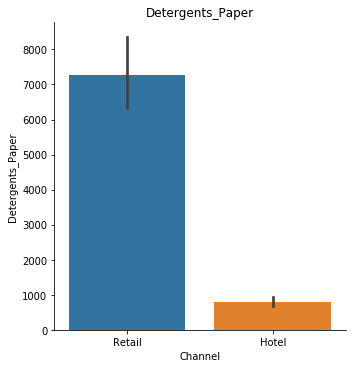

In [17]:
sns.catplot(x="Channel", y="Detergents_Paper", kind="bar", data=cust);
plt.title('Detergents_Paper');

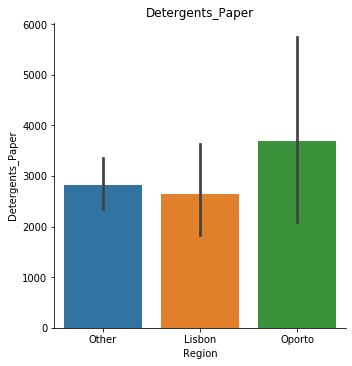

In [18]:
sns.catplot(x="Region", y="Detergents_Paper", kind="bar", data=cust);
plt.title('Detergents_Paper');

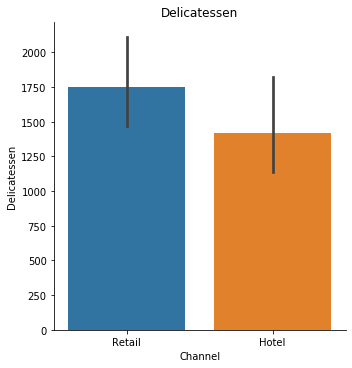

In [19]:
sns.catplot(x="Channel", y="Delicatessen", kind="bar", data=cust);
plt.title('Delicatessen');

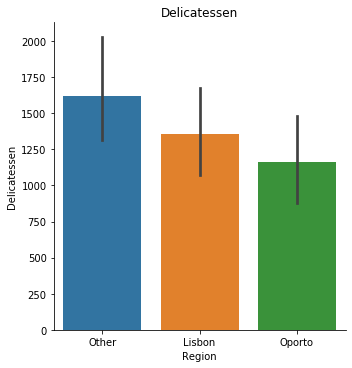

In [20]:
sns.catplot(x="Region", y="Delicatessen", kind="bar", data=cust);
plt.title('Delicatessen');

1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?Which items shows the least inconsistent behaviour

In [25]:
varieties = cust.drop(columns =['Region', 'Channel']) 
varieties.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [26]:
std_dev_varities = varieties.std()
std_dev_varities

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

Fresh has highest value of standard deviation so it  shows the most inconsistent behaviour.


Delicatessen has lowest value of standard deviation so it  shows the least inconsistent behaviour


In [27]:
cv_varieties = varieties.std() / varieties.mean()
cv_varieties

Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

Fresh has lowest value of Coefficient of variation so it shows the least inconsistent behaviour.


Delicatessen has highest value of Coefficient of variation so it shows the most inconsistent behaviour.


1.4. Are there any outliers in the data?

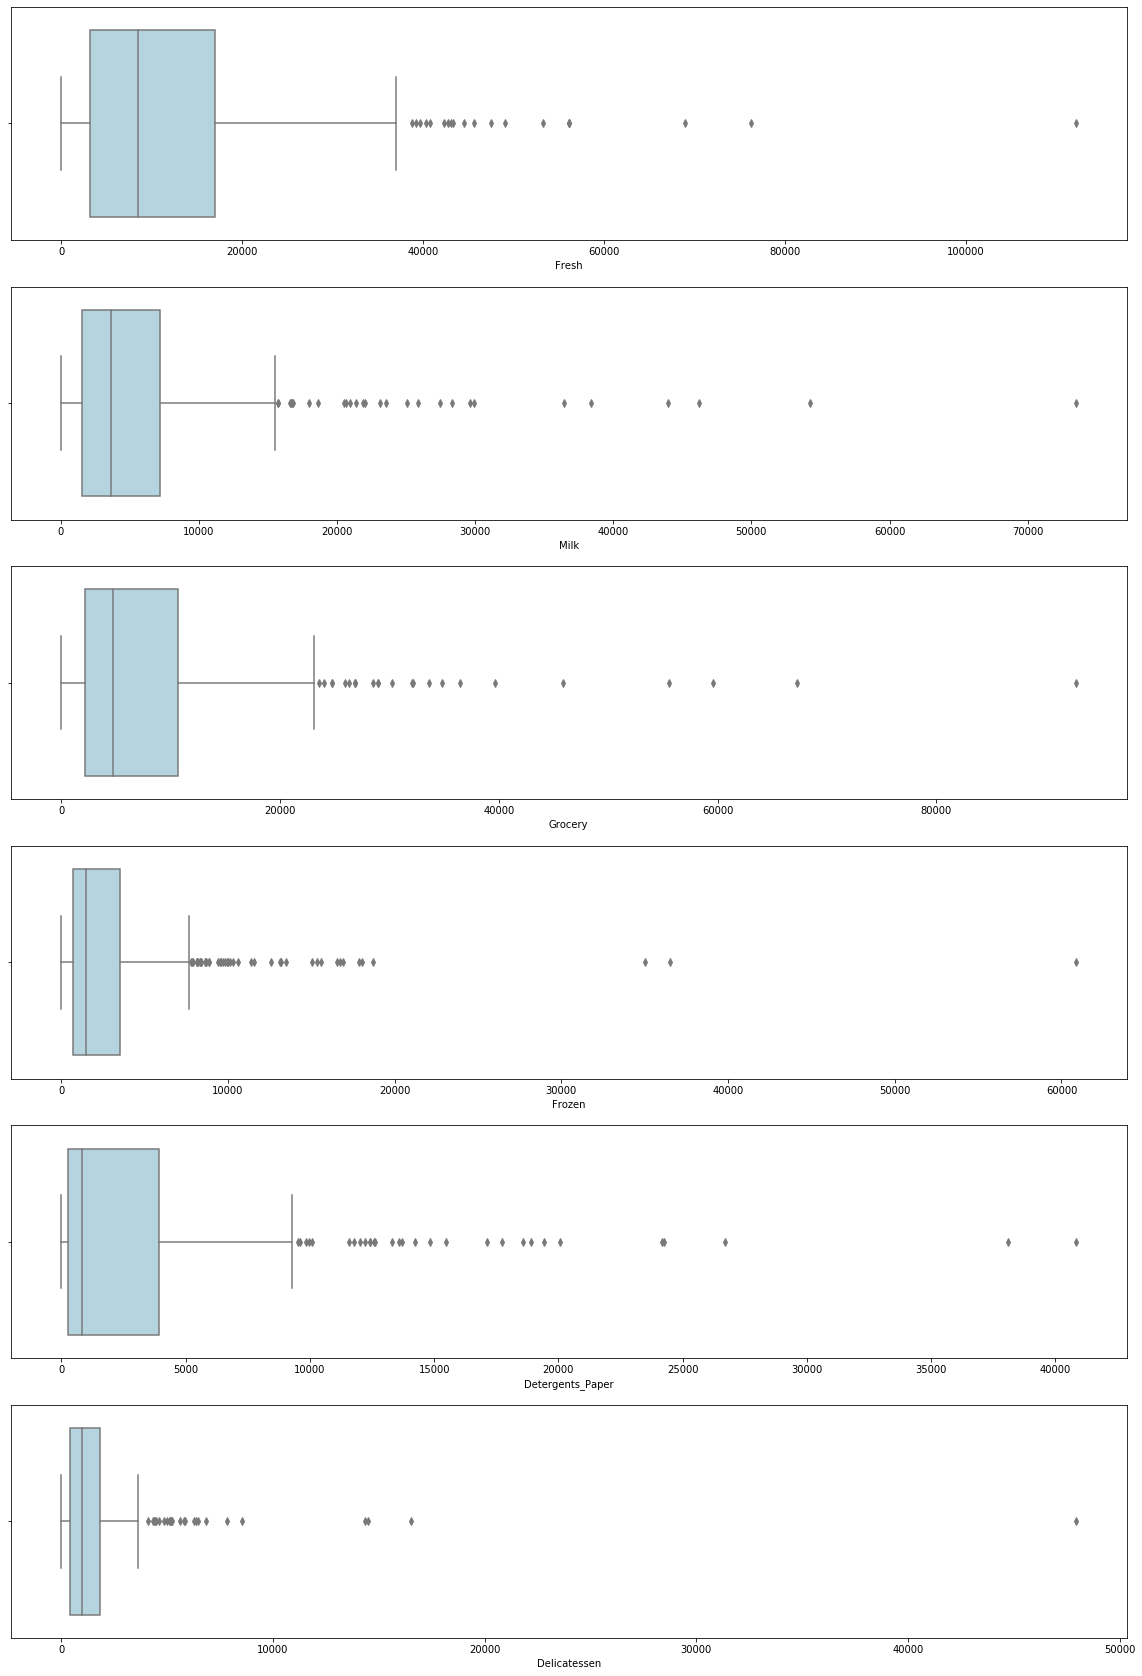

In [29]:
plt.figure(figsize= (20,30))
plt.subplot(6,1,1)
sns.boxplot(x= cust.Fresh,color='lightblue')


plt.subplot(6,1,2)
sns.boxplot(x= cust.Milk, color='lightblue')


plt.subplot(6,1,3)
sns.boxplot(x= cust.Grocery, color='lightblue')


plt.subplot(6,1,4)
sns.boxplot(x= cust.Frozen, color='lightblue')


plt.subplot(6,1,5)
sns.boxplot(x= cust.Detergents_Paper, color='lightblue')


plt.subplot(6,1,6)
sns.boxplot(x= cust.Delicatessen, color='lightblue')

plt.show()

Yes there are outliers in all the items - Fresh, Milk, Grocery, Frozen, Detergents_Paper & Delicatessen

1.5. On the basis of this report, what are the recommendations?

Region which spends more is Other and Channel which spends more is Hotel

Region which spends less is Oporto and Channel which spends less is Retail

Fresh is greater in Hotel channel and Other region

Milk is greater in Retail channel and Other region

Grocery is greater in Retail channel and Oporto region

Frozen is greater in Hotel channel and Oporto region

Detergents_Paper is greater in Retail channel and Oporto region

Delicatessen is greater in Retail channel and Other region

Fresh has highest value of standard deviation so it  shows the most inconsistent behaviour

Delicatessen has lowest value of standard deviation so it  shows the least inconsistent behaviour

Fresh has lowest value of Coefficient of variation so it shows the least inconsistent behaviour

Delicatessen has highest value of Coefficient of variation so it shows the most inconsistent behaviour

Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey.csv file).

Part I

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

In [13]:
survey = pd.read_csv('Survey-1.csv')
survey.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


2.1.1. Gender and Major                                                     

In [14]:
Major = pd.crosstab(survey['Gender'],survey['Major'],margins = True) 
Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


2.1.2. Gender and Grad Intention

In [43]:
Grad = pd.crosstab(survey['Gender'],survey['Grad Intention'],margins = True) 
Grad

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


2.1.3. Gender and Employment

In [45]:
Emp = pd.crosstab(survey['Gender'],survey['Employment'],margins = True) 
Emp

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


2.1.4. Gender and Computer

In [46]:
Computer = pd.crosstab(survey['Gender'],survey['Computer'],margins = True) 
Computer

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

In [51]:
survey.Gender.value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

Total number of male students = 29

Total number of female students = 29

Total number of students =62

2.2.1. What is the probability that a randomly selected CMSU student will be male?

Male Probability = (Total number of male students)/ (Total number of students)


In [137]:
Prob_Male = 29/62
print('Probability that a randomly selected CMSU student will be male',Prob_Male)

Probability that a randomly selected CMSU student will be male 0.46774193548387094


What is the probability that a randomly selected CMSU student will be female?

Female Probability = (Total number of female students)/ (Total number of students)


In [138]:
Prob_Female = 33/62
print('Probability that a randomly selected CMSU student will be female',Prob_Female)

Probability that a randomly selected CMSU student will be female 0.532258064516129


2.2.2. Find the conditional probability of different majors among the male students in CMSU.

Find the conditional probability of different majors among the female students of CMSU.

In [89]:
Major = pd.crosstab(survey['Gender'],survey['Major'],margins = True) 
Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [68]:
Prob_Acc_Male = 4/29
print('Probability that student is male and Accounting student is',Prob_Acc_Male)
print(' ')

Prob_CIS_Male = 1/29
print('Probability that student is male and CIS student is',Prob_CIS_Male)
print(' ')

Prob_Eco_Male = 4/29
print('Probability that student is male and Economics/Finance student is',Prob_Eco_Male)
print(' ')

Prob_Bus_Male = 2/29
print('Probability that student is male and International Business student is',Prob_Bus_Male)
print(' ')

Prob_Mgmt_Male = 6/29
print('Probability that student is male and Management student is',Prob_Mgmt_Male)
print(' ')

Prob_Other_Male = 4/29
print('Probability that student is male and Other student is',Prob_Other_Male)
print(' ')

Prob_Retail_Male = 5/29
print('Probability that student is male and Retailing/Marketing student is',Prob_Retail_Male)
print(' ')

Prob_Undec_Male = 3/29
print('Probability that student is male and Undecided student is',Prob_Undec_Male)
print(' ')

Probability that student is male and Accounting student is 0.13793103448275862
 
Probability that student is male and CIS student is 0.034482758620689655
 
Probability that student is male and Economics/Finance student is 0.13793103448275862
 
Probability that student is male and International Business student is 0.06896551724137931
 
Probability that student is male and Management student is 0.20689655172413793
 
Probability that student is male and Other student is 0.13793103448275862
 
Probability that student is male and Retailing/Marketing student is 0.1724137931034483
 
Probability that student is male and Undecided student is 0.10344827586206896
 


In [69]:
Prob_Acc_Female = 3/33
print('Probability that student is Female and Accounting student is',' ',Prob_Acc_Female)
print(' ')

Prob_CIS_Female = 3/33
print('Probability that student is Female and CIS student is',' ',Prob_CIS_Female)
print(' ')

Prob_Eco_Female = 7/33
print('Probability that student is Female and Economics/Finance student is',' ',Prob_Eco_Female)
print(' ')

Prob_Bus_Female = 4/33
print('Probability that student is Female and International Business student is',' ',Prob_Bus_Female)
print(' ')

Prob_Mgmt_Female = 4/33
print('Probability that student is Female and Management student is',' ',Prob_Mgmt_Female)
print(' ')

Prob_Other_Female = 3/33
print('Probability that student is Female and Other student is',' ',Prob_Other_Female)
print(' ')

Prob_Retail_Female = 9/33
print('Probability that student is Female and Retailing/Marketing student is',' ',Prob_Retail_Female)
print(' ')

Prob_Undec_Female = 0/33
print('Probability that student is Female and Undecided student is',' ',Prob_Undec_Female)

Probability that student is Female and Accounting student is   0.09090909090909091
 
Probability that student is Female and CIS student is   0.09090909090909091
 
Probability that student is Female and Economics/Finance student is   0.21212121212121213
 
Probability that student is Female and International Business student is   0.12121212121212122
 
Probability that student is Female and Management student is   0.12121212121212122
 
Probability that student is Female and Other student is   0.09090909090909091
 
Probability that student is Female and Retailing/Marketing student is   0.2727272727272727
 
Probability that student is Female and Undecided student is   0.0


2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.


In [112]:
Grad_Intention = pd.crosstab(survey['Gender'],survey['Grad Intention'],margins = True) 
Grad_Intention

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [105]:
Prob_Intent_Grad_Male = 17/29
print('Probability of intent to graduate, given that the student is a male is ',Prob_Intent_Grad_Male)

Probability of intent to graduate, given that the student is a male is  0.5862068965517241


Find the conditional probability of intent to graduate, given that the student is a female.

In [109]:
Prob_Intent_Grad_Female = 11/33
print('Probability of intent to graduate, given that the student is a female is ',Prob_Intent_Grad_Female)

Probability of intent to graduate, given that the student is a female is  0.3333333333333333


2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

In [113]:
Employment = pd.crosstab(survey['Gender'],survey['Employment'],margins = True) 
Employment

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [70]:
Prob_Full_Time_Male = 7/29
print('Probability that employment status is Full_Time for the male student is ',Prob_Full_Time_Male)

Prob_Part_Time_Male = 19/29
print('Probability that employment status is Part_Time for the male student is ',Prob_Part_Time_Male)

Prob_Unemployed_Male = 3/29
print('Probability that employment status is Unemployed for the male student is ',Prob_Unemployed_Male)

Probability that employment status is Full_Time for the male student is  0.2413793103448276
Probability that employment status is Part_Time for the male student is  0.6551724137931034
Probability that employment status is Unemployed for the male student is  0.10344827586206896


In [72]:
Prob_Full_Time_Female = 3/33
print('Probability that employment status is Full_Time for the female student is ',Prob_Full_Time_Female)

Prob_Part_Time_Female = 24/33
print('Probability that employment status is Part_Time for the female student is ',Prob_Part_Time_Female)

Prob_Unemployed_Female = 6/33
print('Probability that employment status is Unemployed for the female student is ',Prob_Unemployed_Female)

Probability that employment status is Full_Time for the female student is  0.09090909090909091
Probability that employment status is Part_Time for the female student is  0.7272727272727273
Probability that employment status is Unemployed for the female student is  0.18181818181818182


2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.

In [117]:
Computer = pd.crosstab(survey['Gender'],survey['Computer'],margins = True) 
Computer

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [73]:
Prob_Laptop_Male = 26/29
print('Probability of laptop preference among the male students is ',Prob_Laptop_Male)

Probability of laptop preference among the male students is  0.896551724137931


In [74]:
Prob_Laptop_Female = 29/33
print('Probability of laptop preference among the female students is ',Prob_Laptop_Female)

Probability of laptop preference among the female students is  0.8787878787878788


2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender?
Justify your comment in each case.

According to the definition, two events are independent if and only if
P(A and B)=P(A)×P(B)

Prob_Male = 0.46774193548387094

Prob_Female = 0.532258064516129

Gender - Male and Major

In [77]:
Prob_Male_Acc = 0.13793103448275862
RHS = Prob_Male * Prob_Male_Acc
print(RHS)

0.06451612903225806


Since Prob_Male_Acc != Prob_Male * Prob_Male_Acc, therefore Male and Accounting are dependent events

In [79]:
Prob_CIS_Male = 0.09090909090909091
RHS = Prob_Male * Prob_CIS_Male
print(RHS)

0.04252199413489736


Since Prob_CIS_Male != Prob_Male * Prob_CIS_Male, therefore Male and CIS are dependent events

In [80]:
Prob_Eco_Male =0.13793103448275862
RHS = Prob_Male * Prob_Eco_Male
print(RHS)

0.06451612903225806


Since Prob_Eco_Male != Prob_Male * Prob_Eco_Male, therefore Male and Economics/Finance are dependent events

In [82]:
Prob_Bus_Male = 0.06896551724137931
RHS = Prob_Male * Prob_Bus_Male
print(RHS)

0.03225806451612903


Since Prob_Bus_Male != Prob_Male * Prob_Bus_Male, therefore male and International Business student are dependent events.

In [83]:
Prob_Mgmt_Male = 0.20689655172413793
RHS = Prob_Male * Prob_Mgmt_Male
print(RHS)

0.0967741935483871


Since Prob_Mgmt_Male != Prob_Male * Prob_Mgmt_Male, therefore male and Management student are dependent events.

In [87]:
Prob_Other_Male = 0.13793103448275862
RHS = Prob_Male * Prob_Other_Male
print(RHS)

0.06451612903225806


Since Prob_Other_Male != Prob_Male * Prob_Other_Male, therefore male and Other student are dependent events.

In [88]:
Prob_Retail_Male = 0.1724137931034483
RHS = Prob_Male * Prob_Retail_Male
print(RHS)

0.08064516129032258


Since Prob_Retail_Male != Prob_Male * Prob_Retail_Male, therefore male and Retailing/Marketing student are dependent events.

In [89]:
Prob_Undec_Male = 0.10344827586206896
RHS = Prob_Male * Prob_Undec_Male
print(RHS)

0.04838709677419355


Since Prob_Undec_Male != Prob_Male * Prob_Undec_Male, therefore male and Undecided student are dependent events.

Gender - Female and Major

In [90]:
Prob_Acc_Female = 0.09090909090909091
RHS = Prob_Female * Prob_Acc_Female
print(RHS)

0.04838709677419355


Since Prob_Acc_Female != Prob_Female * Prob_Acc_Female, therefore female and Accounting  student are dependent events.

In [91]:
Prob_CIS_Female = 0.09090909090909091
RHS = Prob_Female * Prob_CIS_Female
print(RHS)

0.04838709677419355


Since Prob_CIS_Female != Prob_Female * Prob_CIS_Female, therefore female and CIS  student are dependent events.

In [92]:
Prob_Eco_Female = 0.21212121212121213
RHS = Prob_Female * Prob_Eco_Female
print(RHS)

0.11290322580645161


Since Prob_Eco_Female != Prob_Female * Prob_Eco_Female, therefore female and Economics/Finance student are dependent events.

In [93]:
Prob_Bus_Female = 0.21212121212121213
RHS = Prob_Female * Prob_Bus_Female
print(RHS)

0.11290322580645161


Since Prob_Bus_Female != Prob_Female * Prob_Bus_Female, therefore female and International Business student are dependent events.

In [94]:
Prob_Mgmt_Female = 0.12121212121212122
RHS = Prob_Female * Prob_Mgmt_Female
print(RHS)

0.06451612903225806


Since Prob_Mgmt_Female != Prob_Female * Prob_Mgmt_Female, therefore female and Management  student are dependent events.

In [95]:
Prob_Other_Female = 0.09090909090909091
RHS = Prob_Female * Prob_Other_Female
print(RHS)

0.04838709677419355


Since Prob_Other_Female != Prob_Female * Prob_Other_Female, therefore female and Other student are dependent events.

In [96]:
Prob_Retail_Female = 0.2727272727272727
RHS = Prob_Female * Prob_Retail_Female
print(RHS)

0.14516129032258063


Since Prob_Retail_Female != Prob_Female * Prob_Retail_Female, therefore female and Retailing/Marketing student are dependent events.

In [97]:
Prob_Undec_Female = 0.2727272727272727
RHS = Prob_Female * Prob_Undec_Female
print(RHS)

0.14516129032258063


Since Prob_Undec_Female != Prob_Female * Prob_Undec_Female, therefore female and Undecided student are dependent events.

Gender - Male and Graduation Intent

In [98]:
Prob_Intent_Grad_Male = 0.5862068965517241
RHS = Prob_Male * Prob_Intent_Grad_Male
print(RHS)

0.27419354838709675


Since Prob_Intent_Grad_Male != Prob_Male * Prob_Intent_Grad_Male, therefore Grad Intention and male are dependent events.

Gender - Female and Graduation Intent

In [99]:
Prob_Intent_Grad_Female = 0.5862068965517241
RHS = Prob_Female * Prob_Intent_Grad_Female
print(RHS)

0.31201334816462734


Since Prob_Intent_Grad_Female != Prob_Male * Prob_Intent_Grad_Female, therefore Grad Intention and female are dependent events.

Gender - Male and Employment status

In [103]:
Prob_Full_Time_Male = 0.2413793103448276
RHS = Prob_Acc_Male * Prob_Full_Time_Male
print(RHS)

0.03329369797859691


Since Prob_Full_Time_Male != Prob_Acc_Male * Prob_Full_Time_Male, therefore male and Full time employment status are dependent events.

In [104]:
Prob_Part_Time_Male = 0.6551724137931034
RHS = Prob_Acc_Male * Prob_Part_Time_Male
print(RHS)

0.09036860879904875


Since Prob_Part_Time_Male != Prob_Acc_Male * Prob_Part_Time_Male, therefore male and Part time employment status are dependent events.

In [105]:
Prob_Unemployed_Male = 0.10344827586206896
RHS = Prob_Acc_Male * Prob_Unemployed_Male
print(RHS)

0.014268727705112961


Since Prob_Unemployed_Male != Prob_Acc_Male * Prob_Unemployed_Male, therefore male and Unemployed employment status are dependent events.

Gender - Female and Employment status

In [106]:
Prob_Full_Time_Female = 0.09090909090909091
RHS = Prob_Acc_Female * Prob_Full_Time_Female
print(RHS)

0.008264462809917356


Since Prob_Full_Time_Female != Prob_Acc_Female * Prob_Full_Time_Female, therefore female and Full time employment status are dependent events.

In [107]:
Prob_Part_Time_Female = 0.7272727272727273
RHS = Prob_Acc_Female * Prob_Part_Time_Female
print(RHS)

0.06611570247933884


Since Prob_Part_Time_Female != Prob_Acc_Female * Prob_Part_Time_Female, therefore female and part-time employment status are dependent events.

In [108]:
Prob_Unemployed_Female = 0.18181818181818182
RHS = Prob_Acc_Female * Prob_Unemployed_Female
print(RHS)

0.01652892561983471


Since Prob_Unemployed_Female != Prob_Acc_Female * Prob_Unemployed_Female, therefore female and Unemployed employment status are dependent events.

Gender - male and Laptop

In [109]:
Prob_Male_Laptop = 0.896551724137931
RHS = Prob_Male * Prob_Male_Laptop
print(RHS)


0.4193548387096774


Since Prob_Male_Laptop != Prob_Male * Prob_Male_Laptop, Male and Laptop are dependent events

Gender - Female and Laptop

In [110]:
Prob_Female_Laptop = 0.8787878787878788
RHS = Prob_Female * Prob_Female_Laptop
print(RHS)

0.46774193548387094


Since Prob_Female_Laptop != Prob_Female * Prob_Female_Laptop, Female and Laptop are dependent events.

Part II

2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
Write a note summarizing your conclusions.
[Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]

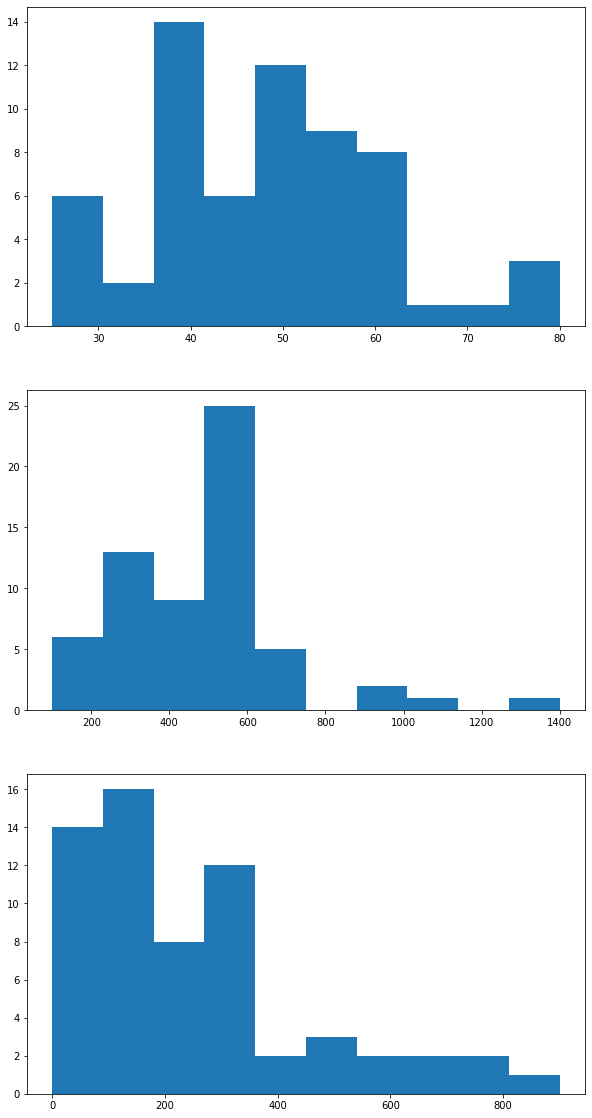

In [33]:
cols = ["Salary","Spending","Text Messages"]
plt.figure(figsize=[10,20])
for i in range(len(cols)):
    plt.subplot(3,1,i+1)
    plt.hist(survey[cols[i]])

In [53]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(survey['Salary']),stats.skew(survey['Spending']),stats.skew(survey['Text Messages'])]},
                        index=['Salary','Spending','Text Messages'])
Skewness

,Skewness
Salary,0.521677
Spending,1.547285
Text Messages,1.264245


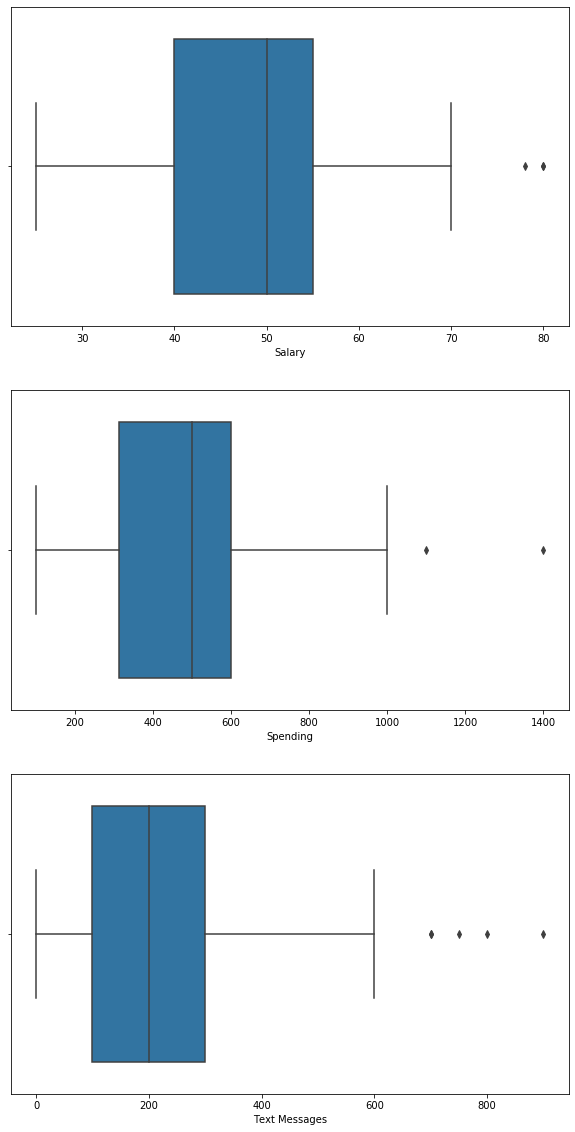

In [22]:
cols = ["Salary","Spending","Text Messages"]
plt.figure(figsize=[10,20])
for i in range(len(cols)):
    plt.subplot(3,1,i+1)
    sns.boxplot(survey[cols[i]])

Salary is very less skewed , almost follows a symmetric  distribution.

Spending is right skewed and does not follow a symmetric distribution.

Text Messages  is right skewed and does not follow a symmetric distribution.

Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company claims that the mean moisture content cannot be greater than 0.35 pound per 100 square feet.
The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.


For the A shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet  is given:

Ho<=0.35

Ha>0.35

For the B shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is given:

Ho<=0.35

Ha>0.35

3.1 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [112]:
prob3=pd.read_csv('A & B shingles-1.csv')
prob3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [113]:
prob3['A'].value_counts().sum()

36

In [136]:
prob3['B'].value_counts().sum()

31

The population means for shingles A and B are equal

Ho : mu(A) = mu(B)

Ha : mu(A) != mu(B)

In [115]:
t_statistic, p_value  = ttest_ind(prob3['A'],prob3['B'],nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value) 

tstat 1.2896282719661123
P Value 0.2017496571835306


Since p_value > alpha , therefore failed reject Null Hypothesis.

Therefore moisture content of B-shingles is not equal to moisture content of A-shingles

3.2 What assumption about the population distribution is needed in order to conduct the hypothesis tests above?

Scale of measurement of the data

In [135]:
prob3.describe(include ='all')

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


Sample size of A 

In [126]:
prob3['A'].value_counts().sum()

36

Sample size of B

In [128]:
prob3['B'].value_counts().sum()

31

Assumption about the population/sample

In [129]:
MUa = 0.316667
MUb = 0.273548

alpha = 0.05

xbar_A = 0.316666667
xbar_B = 0.273548387

std_dev_A = 0.135731
std_dev_B = 0.137296

Distribution of the data

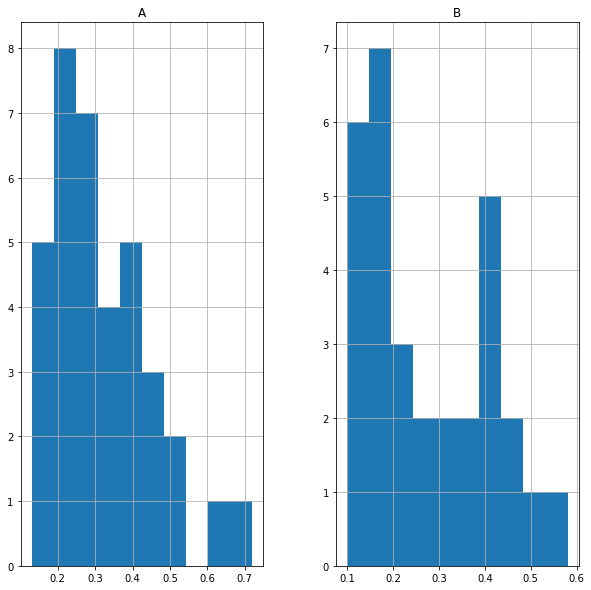

In [132]:
prob3.hist(figsize=[10,10]);